In [1]:
import os

os.getcwd()

'C:\\Users\\minod\\AI Projects'

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '.jupyter',
 'Ai Chatbot',
 'AI Prompt Engineering',
 'Seaborn installation.ipynb']

In [3]:
import pandas as pd

# Load csv file & preview data
df = pd.read_csv('AI Prompt Engineering/genai_prompt_audit_template.csv')
df.head()

,question,prompt_style,prompt,ai_response,clarity_score,accuracy_score,tone_score
0,Tenant rights in BC,Direct,What are my rights as a tenant in British Colu...,NaN,NaN,NaN,NaN
1,Tenant rights in BC,Formal,I’m a tenant living in BC. Can you summarize m...,NaN,NaN,NaN,NaN
2,Tenant rights in BC,Friendly,Hey! I’m renting a place in BC — what kind of ...,NaN,NaN,NaN,NaN
3,Divorce in Ontario,Direct,How do I file for divorce in Ontario?,NaN,NaN,NaN,NaN
4,Divorce in Ontario,Formal,I need to file for divorce in Ontario. Can you...,NaN,NaN,NaN,NaN


### Opens a spreadsheet-style editable view
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None
df

In [4]:
# Add scores manually
for i in range(len(df)):
    print(f"\nPrompt #{i+1}: {df.loc[i, 'prompt']}")
    clarity = input("Clarity (0-5): ")
    accuracy = input("Accuracy (0-5): ")
    tone = input("Tone (0-5): ")

    df.loc[i, 'clarity_score'] = int(clarity)
    df.loc[i, 'accuracy_score'] = int(accuracy)
    df.loc[i, 'tone_score'] = int(tone)


Prompt #1: What are my rights as a tenant in British Columbia?


Clarity (0-5):  4
Accuracy (0-5):  5
Tone (0-5):  3



Prompt #2: I’m a tenant living in BC. Can you summarize my legal rights according to provincial law?


Clarity (0-5):  3
Accuracy (0-5):  5
Tone (0-5):  3



Prompt #3: Hey! I’m renting a place in BC — what kind of legal protections do I have as a tenant?


Clarity (0-5):  5
Accuracy (0-5):  5
Tone (0-5):  5



Prompt #4: How do I file for divorce in Ontario?


Clarity (0-5):  4
Accuracy (0-5):  5
Tone (0-5):  3



Prompt #5: I need to file for divorce in Ontario. Can you outline the legal steps required under provincial law?


Clarity (0-5):  5
Accuracy (0-5):  4
Tone (0-5):  4



Prompt #6: Hi, I live in Ontario and I’m thinking about getting divorced. What should I do first?


Clarity (0-5):  5
Accuracy (0-5):  4
Tone (0-5):  5



Prompt #7: How long do I have to pay an invoice after legal services?


Clarity (0-5):  3
Accuracy (0-5):  5
Tone (0-5):  4



Prompt #8: What are the legal rules in Canada for paying invoices after receiving services from a law firm?


Clarity (0-5):  4
Accuracy (0-5):  5
Tone (0-5):  4



Prompt #9: I just got billed by my lawyer. Is there a deadline for when I need to pay?


Clarity (0-5):  5
Accuracy (0-5):  4
Tone (0-5):  5


In [5]:
df.head()

,question,prompt_style,prompt,ai_response,clarity_score,accuracy_score,tone_score
0,Tenant rights in BC,Direct,What are my rights as a tenant in British Colu...,NaN,4.0,5.0,3.0
1,Tenant rights in BC,Formal,I’m a tenant living in BC. Can you summarize m...,NaN,3.0,5.0,3.0
2,Tenant rights in BC,Friendly,Hey! I’m renting a place in BC — what kind of ...,NaN,5.0,5.0,5.0
3,Divorce in Ontario,Direct,How do I file for divorce in Ontario?,NaN,4.0,5.0,3.0
4,Divorce in Ontario,Formal,I need to file for divorce in Ontario. Can you...,NaN,5.0,4.0,4.0


In [12]:
score_cols = ['clarity_score', 'accuracy_score', 'tone_score']

# Grouped averages

style_avg = df.groupby('prompt_style')[score_cols].mean().round(2)


In [17]:
# Print averages

print("Grouped Averages:\n", style_avg)

Grouped Averages:
               clarity_score  accuracy_score  tone_score
prompt_style                                           
Direct                 3.67            5.00        3.33
Formal                 4.00            4.67        3.67
Friendly               5.00            4.33        5.00


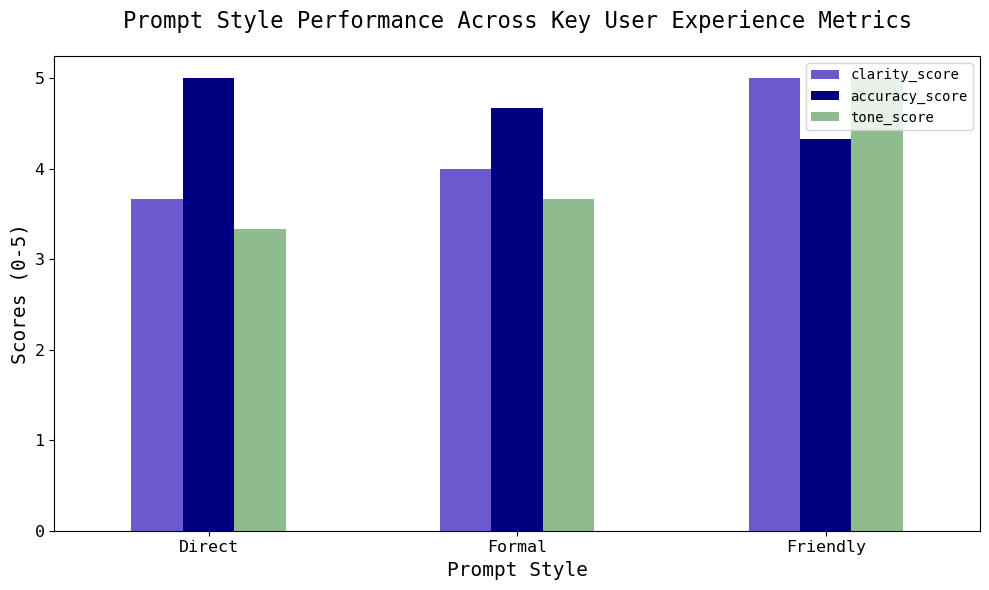

In [60]:
import matplotlib.pyplot as plt

# global font
#Font size, style Global
plt.rcParams.update({
    'font.family' : 'monospace'
})

# plot average scores by prompt style
style_avg.plot(kind='bar', figsize=(10,6), color=['slateblue','navy','darkseagreen'])
plt.title("Prompt Style Performance Across Key User Experience Metrics", pad=20, fontsize=16)
plt.xlabel("Prompt Style", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel("Scores (0-5)", fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig('Average_scores_by_promptstyle')
plt.show()

In [63]:
# Average overall score for each prompt style

# calculate average per row
df['overall_score']=df[score_cols].mean(axis=1)

# group by style + calculate average overall score
overall_avg = df.groupby('prompt_style')['overall_score'].mean().round(2)

print(overall_avg)

prompt_style
Direct      4.00
Formal      4.11
Friendly    4.78
Name: overall_score, dtype: float64


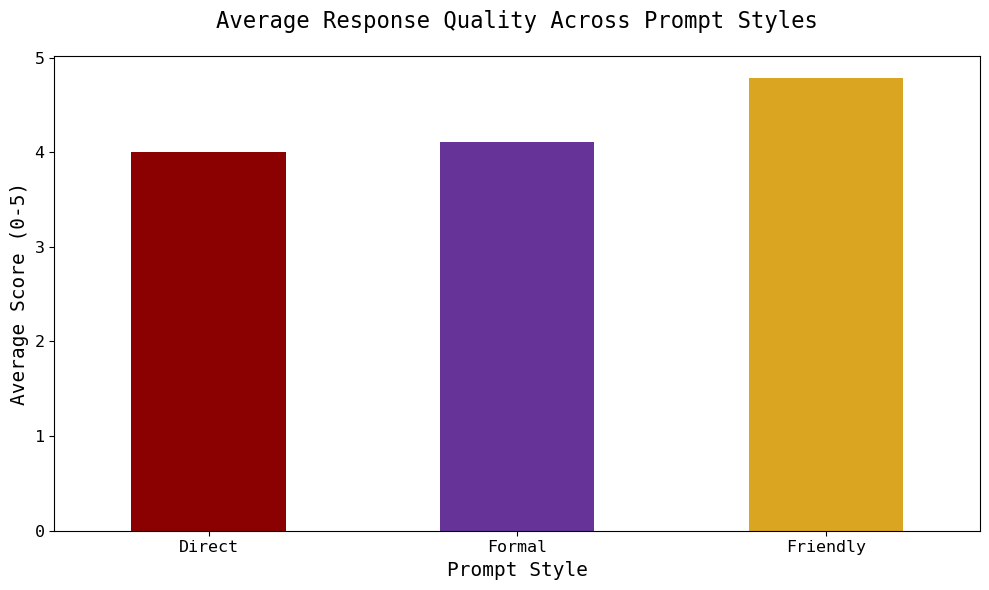

In [75]:
# Comparison of overall score of each prompt style

overall_avg.plot(kind='bar', figsize=(10,6), color=['darkred','rebeccapurple','goldenrod'])
plt.title('Average Response Quality Across Prompt Styles', fontsize=16, pad=20)
plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Prompt Style', fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Average Score (0-5)', fontsize=14)
plt.tight_layout()
plt.savefig('Avg_score_for_each_promptstyle')
plt.show()

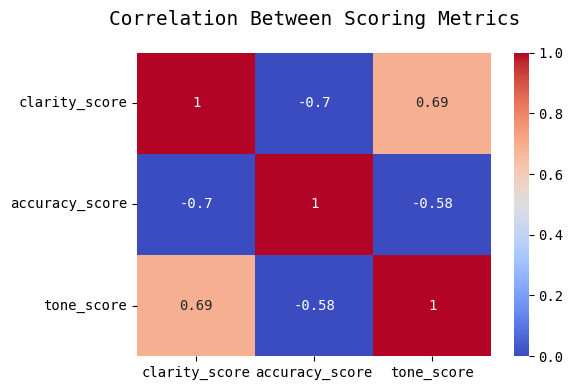

In [79]:
# Correlations between scores

import seaborn as sns

# matrix
corr = df[['clarity_score', 'accuracy_score', 'tone_score']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Between Scoring Metrics', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('Correlation_bw_scores')
plt.show()